<a href="https://colab.research.google.com/github/gwangjinjeong/Study_DeepLearning/blob/main/DNN/03_Computer_Vision_with_DNN_using_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praparation

In [1]:
from google.colab import drive,files
drive.mount('./gdrive')

Mounted at ./gdrive


In [2]:
cd gdrive/MyDrive/TensorFlow

/content/gdrive/MyDrive/TensorFlow


In [3]:
!pip install tensorflow==2.5.0 ## for 

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 4.0 MB 51.7 MB/s 
     |████████████████████████████████| 1.2 MB 75.4 MB/s 
     |████████████████████████████████| 462 kB 93.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=e6b2a980fddec2d0922a07e7e28f5c5acb64bc6e6d65dd040cd2c2dcdd12def5
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Fashion-MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

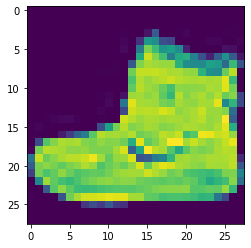

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])

In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [9]:
print(train_labels[0])

9


위에서 보다싶이 0-255의 숫자로 되어 있는것을 볼수 있다.   
하지만, 인공지능 학습을 시킬때에는 모든 값을 0-1 사이의 값으로 만들어 주는것이 좋다. 이를 '**Normalization**'이라고 한다.
그래서 다음 코드를 수행시킨다.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

학습을 진행중에 이미 원하는 소기의 성과를 달성했을경우   
학습을 좀 더 진행할 필요까지는 없다.   
그럴떄 `callback`함수를 통해서 확인해보자.

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epock_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\n Loss is low so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [21]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

In [22]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
model.fit(x = train_images,
          y = train_labels,
          epochs = 5,
          callbacks = [callback]
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4755 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3578 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3207 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2783 - accuracy: 0.8963


test 데이터를 확인해 보았을때,   
loss는 약 0.33   
accuracy는 약 0.88   
인것을 확인할 수 있다.   
train data와 test 데이터의 결과 오차가 크지 않으므로 overfitting의 위험에서 벗어나 있다고 볼 수 있다.

In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8843


[0.3333085775375366, 0.8842999935150146]

상세히 확인해보자

Label number: 9


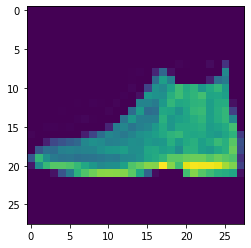

In [43]:
plt.imshow(test_images[0])
print(f'Label number: {test_labels[0]}')

In [44]:
result = model.predict(test_images)
print(result[0])

[3.0270620e-08 9.0226138e-09 3.3909956e-08 1.6855699e-07 3.2335619e-09
 4.7562507e-04 5.1682449e-08 3.4841690e-02 1.7027712e-06 9.6468061e-01]


결과를 보면 9번째의 값이 가장 1에 근사하다는 사실을 발견할 수 있다.   
이로써 이 모델은 위 사진을 9인 ankel boot로 예측했다. 